In [230]:
%%html
<style>
body{
    font-family:"Lato",cursive,sans-serif;
}
</style>

In [231]:
import warnings
warnings.simplefilter("ignore")

In [232]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%inline matplotlib
import pickle
#pickle is used to save our model

UsageError: Line magic function `%inline` not found.


In [233]:
import os

In [234]:
os.chdir(r"G:\NIKHIL\salary prediction")

In [235]:
ls

 Volume in drive G is New Volume
 Volume Serial Number is 7637-AA14

 Directory of G:\NIKHIL\salary prediction

12/17/2020  11:15 AM    <DIR>          .
12/17/2020  11:15 AM    <DIR>          ..
12/17/2020  10:55 AM    <DIR>          .ipynb_checkpoints
12/17/2020  09:15 AM               682 app.py
12/17/2020  09:15 AM               968 Basic Flask.ipynb
12/17/2020  09:15 AM               312 BasicFlask.py
12/17/2020  09:15 AM             1,965 Client side execution of the model.ipynb
12/17/2020  09:15 AM            23,688 Darshan Model.ipynb
12/17/2020  09:15 AM             2,379 Darshan Model.py
12/17/2020  09:15 AM               160 hiring.csv
12/17/2020  09:15 AM               486 model.pkl
12/17/2020  11:15 AM            26,254 Project 8 submission.ipynb
               9 File(s)         56,894 bytes
               3 Dir(s)  111,887,679,488 bytes free


In [236]:
df= pd.read_csv("hiring.csv")

In [237]:
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [238]:
df.shape

(8, 4)

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       6 non-null      object 
 1   test_score       7 non-null      float64
 2   interview_score  8 non-null      int64  
 3   salary           8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


In [240]:
df.isnull().sum()

experience         2
test_score         1
interview_score    0
salary             0
dtype: int64

In [241]:
df["experience"].fillna(0,inplace=True)

In [242]:
df["test_score"].mean()

7.857142857142857

In [243]:
df["test_score"].fillna(df["test_score"].mean(),inplace=True)

In [244]:
df.isnull().sum()

experience         0
test_score         0
interview_score    0
salary             0
dtype: int64

In [245]:
df.duplicated().sum()

0

In [246]:
df.skew()

test_score         0.362235
interview_score    0.262145
salary            -0.258393
dtype: float64

In [247]:
#SPLIT INTO X AND Y

In [256]:
X=df.drop(["salary"],axis=True)

In [257]:
y=df.pop("salary")

In [258]:
X.head()

,experience,test_score,interview_score
0,0,8.0,9
1,0,8.0,6
2,five,6.0,7
3,two,10.0,10
4,seven,9.0,6


In [259]:
y.head()

0    50000
1    45000
2    60000
3    65000
4    70000
Name: salary, dtype: int64

In [260]:
# Convert text in the cols to integer values

def conv(x):
    dict = {'two':2, 'three':3, 'five':5, 'seven':7, 'ten':10, 0:0, 'eleven':11 }
    return dict[x]

In [261]:
X['experience'] = X['experience'].apply(lambda x: conv(x))

In [264]:
X

,experience,test_score,interview_score
0,0,8.000000,9
1,0,8.000000,6
2,5,6.000000,7
3,2,10.000000,10
4,7,9.000000,6
5,3,7.000000,10
6,10,7.857143,7
7,11,7.000000,8


In [265]:
from sklearn.model_selection import train_test_split

In [266]:
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.30)

In [267]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor() 
model.fit(X,y)

ExtraTreesRegressor()

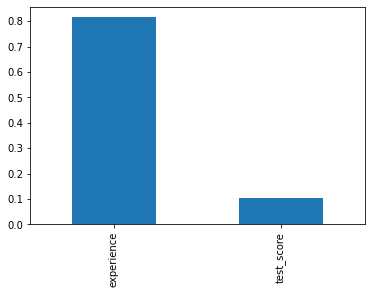

In [268]:
#plot graph of feature importances for better visualization 
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(2).plot(kind='bar') 
plt.show()

In [269]:
from sklearn.linear_model import LinearRegression

In [270]:
lr= LinearRegression()

In [271]:
lr.fit(X,y)

LinearRegression()

In [272]:
y_train_predict = lr.predict(X)

In [273]:
y_train_predict

array([52313.61238494, 45722.68644263, 58231.95591138, 63991.7318464 ,
       67429.06277517, 61080.55179794, 75922.72532666, 79307.67351488])

In [274]:
y.head()

0    50000
1    45000
2    60000
3    65000
4    70000
Name: salary, dtype: int64

In [275]:
from sklearn.metrics import r2_score

In [276]:
X.head()

,experience,test_score,interview_score
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6


In [277]:
r2_score(y_train_predict,y)

0.9626511210293307

In [228]:
y_test_predict = lr.predict(X)

In [280]:
lr.predict([[3,9,8]])

array([60512.4772308])

In [281]:
lr.predict([[10,10,10]])

array([86612.80419155])

In [282]:
#MODEL DEPLOYMENT

In [285]:
import pickle
pickle.dump(lr,open('new.py','wb'))

In [288]:
model = pickle.load(open("new.py",'rb'))

In [289]:
lr.predict([[10,10,10]])

array([86612.80419155])